<a href="https://colab.research.google.com/github/arclive202/statistical_rethinking/blob/main/aditya_roy/Lecture_02_practise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Trying to replicate concepts from https://www.youtube.com/watch?v=R1vcdhPBlXA&list=PLDcUM9US4XdPz-KxHM4XHt7uUVGWWVSus&index=2&t=565s



Using the globe example to understand the concepts of generative function, number of observations of w & l and to estimate the probability of the proportions given the observations
  

In [23]:
# prompt: define a function that accepts an array obs and a float value p
# and calculates pw = count of 1 is obs
# pl = len(obs) - pw
# and returns pw**p * pl**(1-p)


# THIS BIT OF CODE HERE IS THE ESTIMATOR

def proportion_probability(obs, p):
    """
    Calculates pw**p * pl**(1-p) based on the input array obs and probability p.

    Args:
        obs: A list or array of observations (assumed to be 0s and 1s).
        p: The probability value (a float between 0 and 1).

    Returns:
        The calculated probability value, or None if input is invalid.
    """
    pw = obs.count(1)  # Count of 1s in obs
    pl = len(obs) - pw   # Count of elements other than 1s

    if pw < 0 or pl < 0:
        return None  # Handle cases with invalid input

    try:
      result = ((p**pw) * ((1-p)**pl))
      return result
    except OverflowError:
      return float('inf') # Handle potential overflow for large inputs


In [24]:
proportion_probability([1,0,1],0.5)

0.125

In [26]:

def p_prob_array(obs, p_array):
    """
    Calculates the proportion probability for each element in p_array.

    Args:
      p_array: A list of observations (arrays).
      p: The probability value.

    Returns:
      A list of proportion probabilities.
    """
    results = []
    for p in p_array:
        results.append(proportion_probability(obs, p))
    return results

In [28]:
prob_list = p_prob_array([1,0,1],[0,0.25,0.5,0.75,1])

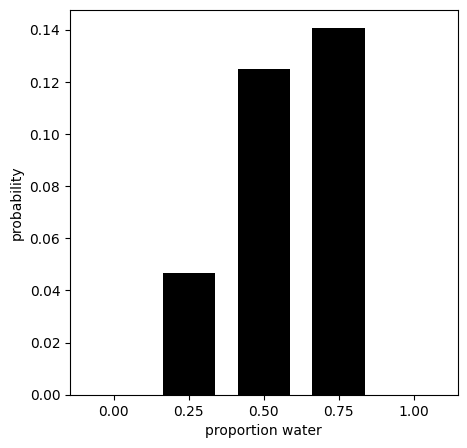

In [37]:
# prompt: plot prob_list in a barplot with x axis as p_ARRAY and y axis as prob_list

import matplotlib.pyplot as plt
import numpy as np

# Assuming prob_list and p_array are defined as in your previous code
obs=[1,0,1]
p_array = [0,0.25,0.5,0.75,1]
# prob_list = p_prob_array([1,0,1],[0,0.25,0.5,0.75,1])

n_possible_probabilities = p_prob_array(obs, p_array)
RESOLUTION = 4
probs = np.linspace(0, 1, RESOLUTION+1)
plt.subplots(figsize=(5, 5))
plt.bar(x=p_array, height=n_possible_probabilities, width= .7 / RESOLUTION, color='k')
plt.xticks(probs);
plt.ylabel("probability")
plt.xlabel("proportion water");

In [35]:
p_prob_array(obs, p_array)

[0, 0.046875, 0.125, 0.140625, 0]

In [36]:
n_possible_probabilities

[0, 0.046875, 0.125, 0.140625, 0]

There are generally 3 important steps

1. code the generative function
2. code an estimator
3. test (2) with (1)

define a sampling function
generative simulation

-- given a probability of globe covered with water, and total number of tosses
this function will define a sample for observation


In [38]:
# prompt: write a function to generate a sample of list of 0 or 1 given the probability of 1 as p and the length of list as n_tosses

import random

def sample_globe_tosses(p, n_tosses):
    """
    Generates a sample list of 0s and 1s based on probability p and number of tosses n_tosses.

    Args:
        p: The probability of getting a 1.
        n_tosses: The number of tosses (length of the list).

    Returns:
        A list of 0s and 1s representing the sample.
    """
    sample = []
    for _ in range(n_tosses):
        if random.random() < p:
            sample.append(1)
        else:
            sample.append(0)
    return sample

CODING THE ESTIMATOR IS THE SAME AS THE TWO FUNCTIONS DEFINED ABOVE

In [83]:
def proportion_probability(obs, p):
    """
    Calculates pw**p * pl**(1-p) based on the input array obs and probability p.

    Args:
        obs: A list or array of observations (assumed to be 0s and 1s).
        p: The probability value (a float between 0 and 1).

    Returns:
        The calculated probability value, or None if input is invalid.
    """
    pw = obs.count(1)  # Count of 1s in obs
    pl = len(obs) - pw   # Count of elements other than 1s

    if pw < 0 or pl < 0:
        return None  # Handle cases with invalid input

    try:
      result = ((p**pw) * ((1-p)**pl))
      return result
    except OverflowError:
      return float('inf') # Handle potential overflow for large inputs




def p_prob_array(obs, p_array):
    """
    Calculates the proportion probability for each element in p_array.

    Args:
      p_array: A list of observations (arrays).
      p: The probability value.

    Returns:
      A list of proportion probabilities.
    """
    results = []
    for p in p_array:
        results.append(proportion_probability(obs, p))
    return results


In [89]:
def plot_posterior(p_array, n_possible_probabilities):
  RESOLUTION = 4
  probs = np.linspace(0, 1, RESOLUTION+1)
  plt.subplots(figsize=(5, 5))
  plt.bar(x=p_array, height=n_possible_probabilities, width= .7 / RESOLUTION, color='k')
  plt.xticks(probs);
  plt.ylabel("probability")
  plt.xlabel("proportion water");


In [84]:
l_val = sample_globe_tosses(0.5, 10)


In [85]:
l_val

[0, 1, 1, 1, 0, 0, 0, 1, 1, 0]

Test on intuitions first, by setting extreme examples

so the l_val from the cell above is akin to obs from the earlier functions


EXAMPLE 1: ASSUME THAT ENTIRE GLOBE IS COVERED WITH WATER

In [90]:
#we have
p_array = [0,0.25,0.5,0.75,1]

#Working with a sample globe completely covered with water

obs_1 = sample_globe_tosses(1, 10)

In [93]:
n_possible_probabilities_1 = p_prob_array(obs_1, p_array)
n_possible_probabilities_1

[0, 9.5367431640625e-07, 0.0009765625, 0.056313514709472656, 1]

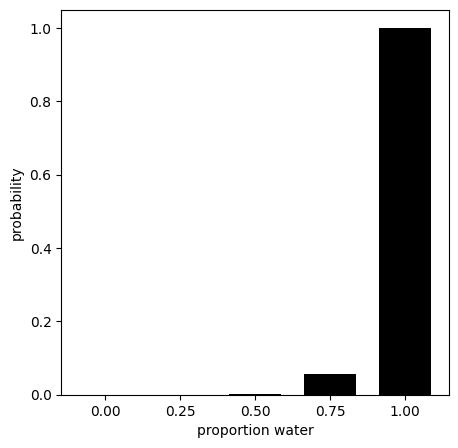

In [94]:
plot_posterior(p_array, n_possible_probabilities_1)

EXAMPLE 2: ASSUME THAT ENTIRE GLOBE IS COVERED WITH LAND

In [67]:
obs_2 = sample_globe_tosses(0, 10)
n_possible_probabilities_2 = p_prob_array(obs_2, p_array)
n_possible_probabilities_2

[1, 0.056313514709472656, 0.0009765625, 9.5367431640625e-07, 0]

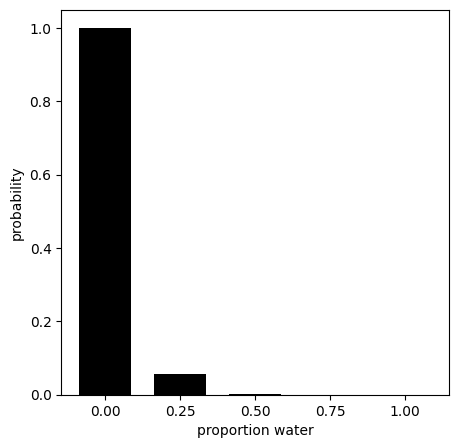

In [95]:
plot_posterior(p_array, n_possible_probabilities_2)

EXAMPLE 3: ASSUME THAT LAND AND WATER ARE EQUALLY DISTRIBUTED

In [81]:
obs_3 = sample_globe_tosses(0.5, 50)
n_possible_probabilities_3 = p_prob_array(obs_3, p_array)
n_possible_probabilities_3

[0, 2.2279761980955244e-19, 8.881784197001252e-16, 2.005178578285972e-18, 0]

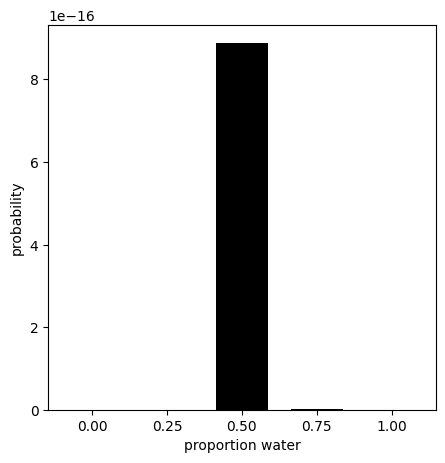

In [96]:
plot_posterior(p_array, n_possible_probabilities_3)